In [1]:
%matplotlib notebook

### Loading a TimeMoc from a fits file

<IPython.core.display.Javascript object>


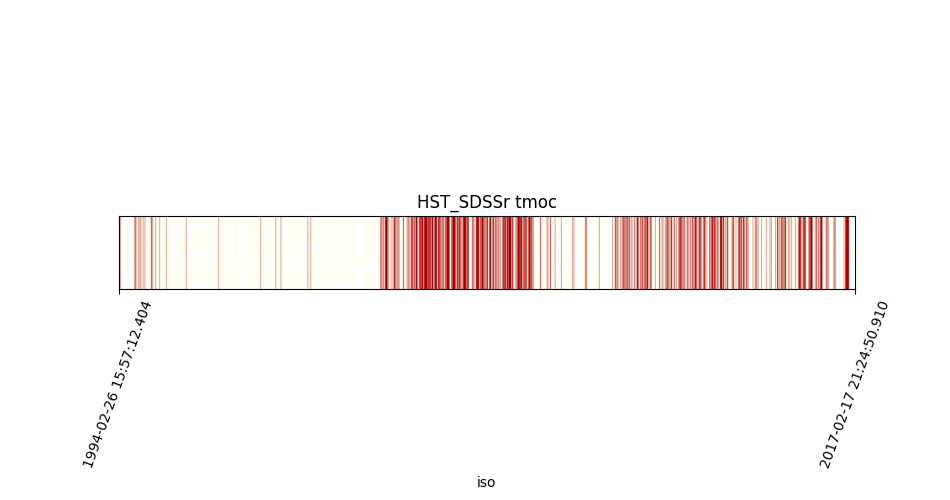

In [2]:
from mocpy import TimeMoc

time_moc = TimeMoc.from_moc_fits_file('http://alasky.u-strasbg.fr/HST-hips/filter_SDSSr_hips/TMoc.fits')
time_moc.plot(title='HST_SDSSr tmoc')

### Loading a TimeMoc from an astropy table

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('II/285')[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
 T ANT 978 2444298.4760  9.520  --  0.853  0.463    --  0.903
 T ANT 978 2444299.4940  9.720  --  0.927  0.484    --  0.953
 T ANT 978 2444300.4070  9.575  --  0.809  0.441    --  0.872
 T ANT 978 2444301.4180  8.881  --  0.499  0.309    --  0.608
 T ANT 978 2444302.4110  9.139  --  0.661  0.392    --  0.754
 T ANT 976 2451619.3105  9.738  --  0.910     --    --  0.959
 T ANT 976 2451619.3828     --  --     --     --    --  0.974
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445204.2187 14.102  --  1.372     --    --     --
NN VUL 950 2445205.2265 14.075  --  1.423     --    --     --
NN VUL 9

CPU times: user 1.53 s, sys: 12 ms, total: 1.54 s
Wall time: 1.54 s


<IPython.core.display.Javascript object>


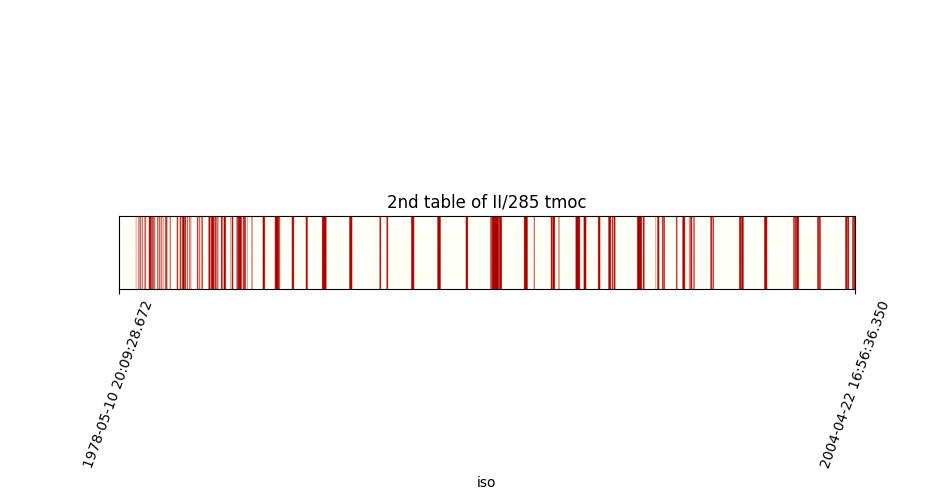

Time of the first observation: 1978-05-10 20:09:28.672
Time of the last observation: 2004-04-22 16:56:36.350
Total duration: 227.42448355555555 jd
max order: 14


In [4]:
%time table_moc = TimeMoc.from_table(table, t_column='JD', format='jd')
table_moc.plot(title='2nd table of II/285 tmoc')

# print characteristics such as the time of the first/last observations
print('Time of the first observation:', table_moc.min_time.iso)
print('Time of the last observation:', table_moc.max_time.iso)
# the total duration of the observation times
print('Total duration: {0} jd'.format(table_moc.total_duration.jd))
# the order of the TimeMoc
print('max order:', table_moc.max_order)

### Filtering an astropy table with a TimeMoc

In [5]:
# filtering the table through the tmoc created from the HST_SDSSr fits file
from astropy.time import TimeDelta

filtered_table = time_moc.filter_table(table=table,
                                      column_name='JD',
                                      format='jd',
                                      keep_inside=True,
                                      delta_t=TimeDelta(3600, format='sec', scale='tdb'))
print(filtered_table)

 Name  Ref      JD       Vmag  U-B B-V V-Rc Rc-Ic  V-Ic 
                d        mag   mag mag mag   mag   mag  
------ --- ------------ ------ --- --- ---- ----- ------
 T ANT 968 2453021.3273  9.396  --  --   --    --  0.873
 T ANT 968 2453022.4863  9.630  --  --   --    --  0.935
 T ANT 968 2453022.5731  9.647  --  --   --    --  0.925
 V CAR 968 2453022.4809  7.510  --  --   --    --  0.942
UX CAR 968 2453021.3261  8.450  --  --   --    --  0.842
YZ CAR 968 2453021.3419  8.462  --  --   --    --  1.204
YZ CAR 968 2453022.5743  8.562  --  --   --    --     --
CT CAR 968 2453021.3427 12.627  --  --   --    --  1.776
HQ CAR 968 2453021.3405 12.025  --  --   --    --  0.886
HQ CAR 968 2453022.5727 11.783  --  --   --    --  0.812
   ... ...          ...    ... ... ...  ...   ...    ...
RZ VEL 968 2453022.6020  6.572  --  --   --    --     --
SW VEL 968 2453022.4837  7.977  --  --   --    --     --
SX VEL 968 2453021.3384  8.435  --  --   --    --  1.124
SX VEL 968 2453022.4842  8.589 

### TimeMoc operation examples :
* #### Intersection of 2 tmocs : (HST_SDSSr) INTER (2nd table of II/285)

<IPython.core.display.Javascript object>


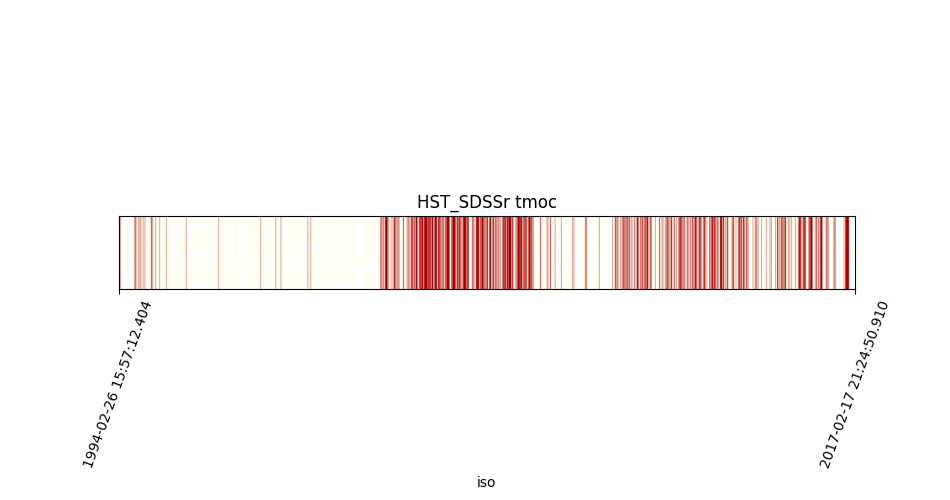

<IPython.core.display.Javascript object>


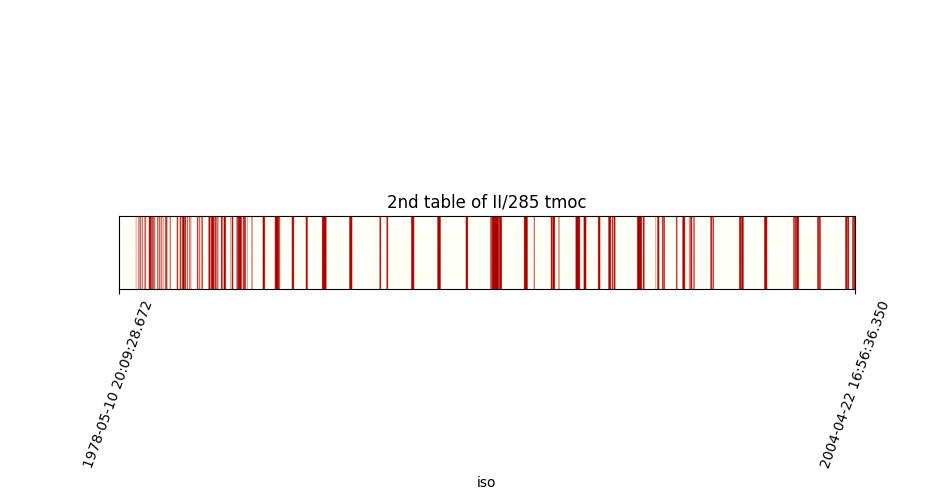

<IPython.core.display.Javascript object>


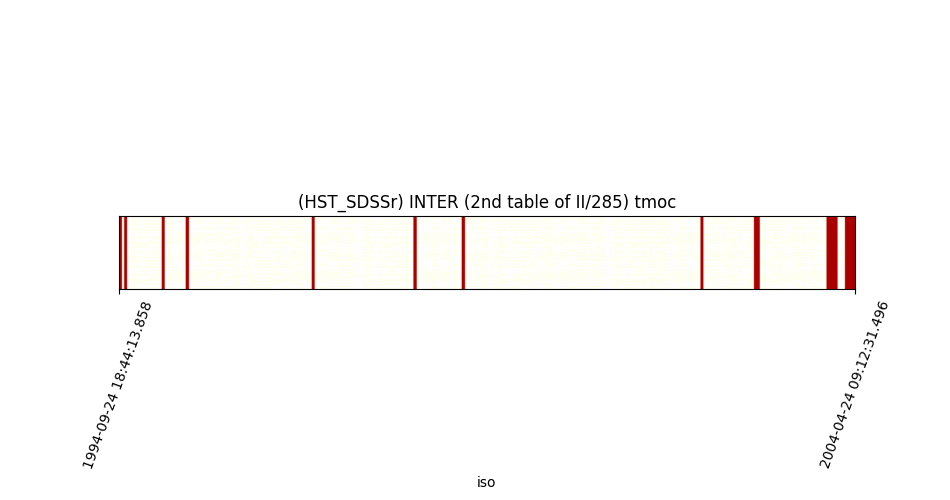

HST_SDSSr max order :  29
2nd table of II/285 max order :  14
(HST_SDSSr) INTER (2nd table of II/285) max order :  9


In [6]:
result = table_moc.intersection(time_moc, delta_t=TimeMoc.order_to_time_resolution(9))

time_moc.plot(title='HST_SDSSr tmoc')
table_moc.plot(title='2nd table of II/285 tmoc')
result.plot(title='(HST_SDSSr) INTER (2nd table of II/285) tmoc')

# print the max order of all the tmocs. Result tmoc must be of order 9
print('HST_SDSSr max order : ', time_moc.max_order)
print('2nd table of II/285 max order : ', table_moc.max_order)
print('(HST_SDSSr) INTER (2nd table of II/285) max order : ', result.max_order)

* #### Augment and Diminish a tmoc

<IPython.core.display.Javascript object>


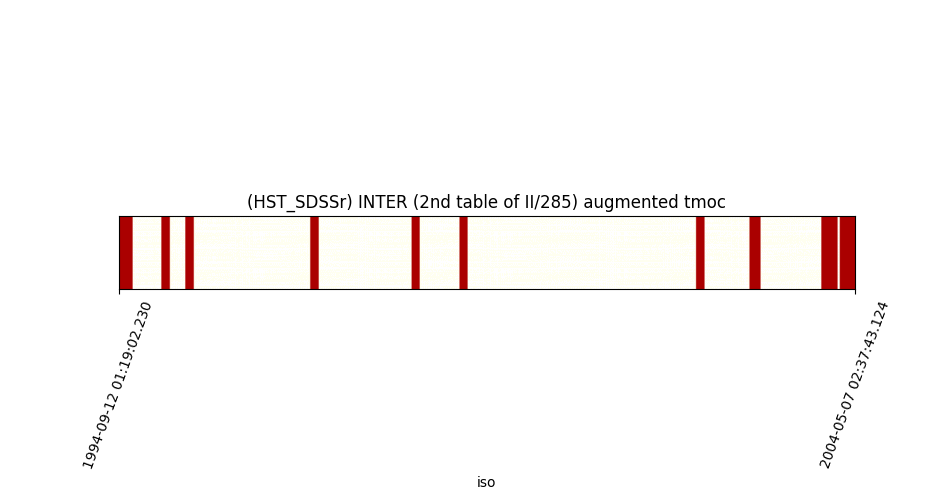

<IPython.core.display.Javascript object>


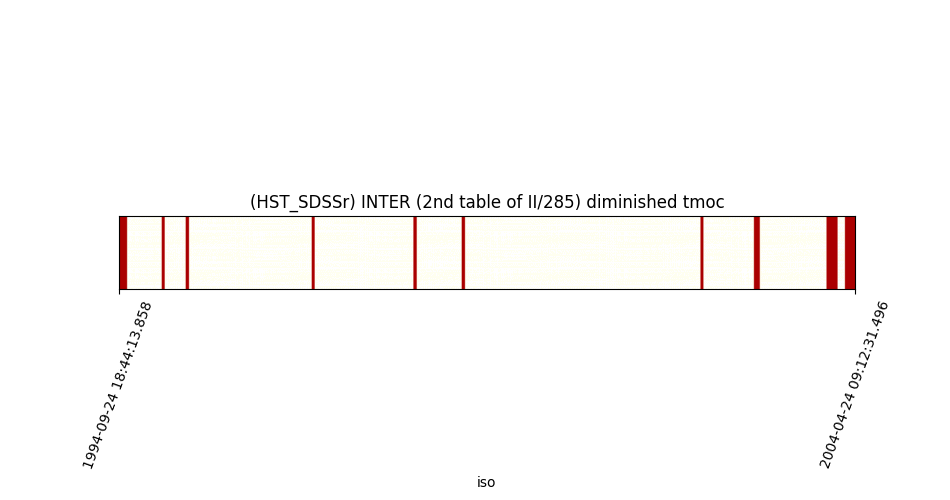

In [7]:
result.add_neighbours()
result.plot(title='(HST_SDSSr) INTER (2nd table of II/285) augmented tmoc')

result.remove_neighbours()
result.plot(title='(HST_SDSSr) INTER (2nd table of II/285) diminished tmoc')

* #### Complement of a TimeMoc

<IPython.core.display.Javascript object>


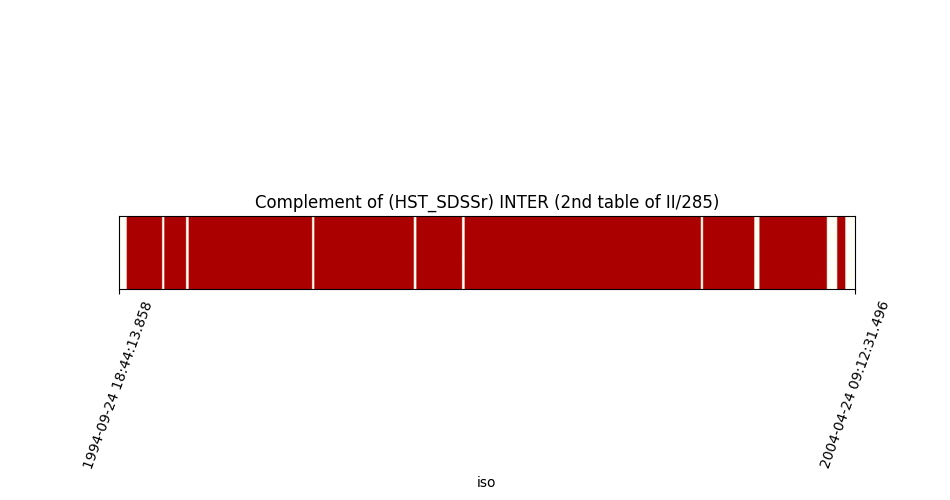

In [8]:
complemented_tmoc = result.complement()
complemented_tmoc.plot(title='Complement of (HST_SDSSr) INTER (2nd table of II/285)',
                       view=(result.min_time, result.max_time))